<a href="https://colab.research.google.com/github/Madhuram2901/Clothings-Classification-using-Neural-Network/blob/main/Clothings_Classification_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Dependencies**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion.load_data()
from sklearn.model_selection import train_test_split

# **Importing Data**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

100%|██████████| 68.8M/68.8M [00:00<00:00, 142MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


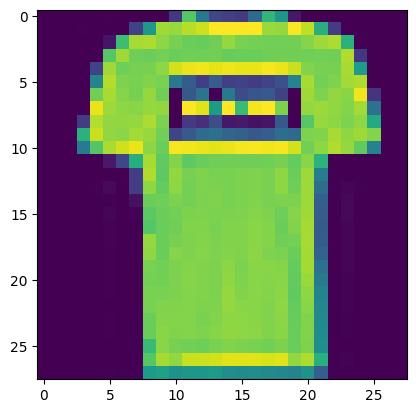

In [ ]:
img = 1
i = train_images[img]
plt.imshow(i)

In [ ]:
train_images.shape, test_images.shape


((60000, 28, 28), (10000, 28, 28))

# **Neural Network Model**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(300, activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(10, activation = "softmax")
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
train_images, xvalid, train_labels, yvalid = train_test_split(train_images, train_labels, test_size = 5000, random_state = 42)

In [ ]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics =  ["accuracy"])

history = model.fit(train_images, train_labels, epochs = 30, validation_data = (xvalid, yvalid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.0977 - loss: 23151364800512.0000 - val_accuracy: 0.0978 - val_loss: 2.3028
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1005 - loss: 2.3025 - val_accuracy: 0.0924 - val_loss: 2.3029
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1022 - loss: 2.3025 - val_accuracy: 0.0960 - val_loss: 2.3027
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.0972 - loss: 2.3026 - val_accuracy: 0.0960 - val_loss: 2.3027
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.1003 - loss: 2.3026 - val_accuracy: 0.0978 - val_loss: 2.3028
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1001 - loss: 2.3026 - val_accuracy: 0.0924 - val_loss: 2.3028
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0998 - loss: 2.3026 - val_accuracy: 0.0924 - val_loss: 2.3028
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0999

In [ ]:
predict = model.predict(test_images)
predict

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[0.09933351, 0.09835779, 0.09988807, ..., 0.10149375, 0.10018317,
        0.10028255],
       [0.09933351, 0.09835779, 0.09988807, ..., 0.10149375, 0.10018317,
        0.10028255],
       [0.09933351, 0.09835779, 0.09988807, ..., 0.10149375, 0.10018317,
        0.10028255],
       ...,
       [0.09933351, 0.09835779, 0.09988807, ..., 0.10149375, 0.10018317,
        0.10028255],
       [0.09933351, 0.09835779, 0.09988807, ..., 0.10149375, 0.10018317,
        0.10028255],
       [0.09933351, 0.09835779, 0.09988807, ..., 0.10149375, 0.10018317,
        0.10028255]], dtype=float32)